Importing the Libraries

In [1]:
# Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

print("Imports done!")

Imports done!


Loading the dataset

In [2]:
df = pd.read_csv(r"Datasets\Static data.csv")

In [3]:
df.head(10)

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1
5,0aedb43f9ba5d3014e0600009c316005.wlanapi.dll,28c98e000d02f8bfd9d050eb4e4c5d2e,34404,84,319776,10,10,374944,9208,312608,14,10,7,262144,16736,2072,0,1
6,0bc194f9-b102-4833-85bd-603e216a9274.dll,706463ecc8e48e9e3a2a12a0cfcb8858,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
7,0c7f9fdc9ba5d301c60900009c316005.wscsvc.dll,39da352fad220e83ce64de8dccb9736b,34404,84,197888,10,10,229024,112,187208,14,10,7,262144,16736,1328,0,1
8,1.0.154_chromesetup_154_59.exe,e11e70ba243800626d17e3ffa6c9fb71,332,28,4240,0,4,0,0,4096,8,0,3,1048576,256,8799820,0,1
9,1035f45d9ca5d3015b0a00009c316005.srclient.dll,a5a106d5d03e6e59b0282e72bc9420f1,34404,84,64704,10,10,67632,404,57648,14,10,6,262144,16736,1072,0,1


**1. Feature Extraction - Data Pre-processing**

Info about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

In [5]:
# Percentage of dominant value in each column
(df.value_counts(normalize=True) > 0.99).sum()

0

In [6]:
# CChecking for null values
df.isnull().sum()

FileName              0
md5Hash               0
Machine               0
DebugSize             0
DebugRVA              0
MajorImageVersion     0
MajorOSVersion        0
ExportRVA             0
ExportSize            0
IatVRA                0
MajorLinkerVersion    0
MinorLinkerVersion    0
NumberOfSections      0
SizeOfStackReserve    0
DllCharacteristics    0
ResourceSize          0
BitcoinAddresses      0
Benign                0
dtype: int64

In [7]:
# Show unique values per column
df.nunique().sort_values()

Benign                    2
BitcoinAddresses          2
Machine                   6
MajorOSVersion           17
DebugSize                26
NumberOfSections         26
SizeOfStackReserve       29
MajorImageVersion        49
DllCharacteristics       86
MajorLinkerVersion       89
MinorLinkerVersion      117
ExportSize             2885
IatVRA                 5727
ResourceSize           9083
DebugRVA              10395
ExportRVA             11673
md5Hash               62485
FileName              62485
dtype: int64

Feature Correlation Heatmap

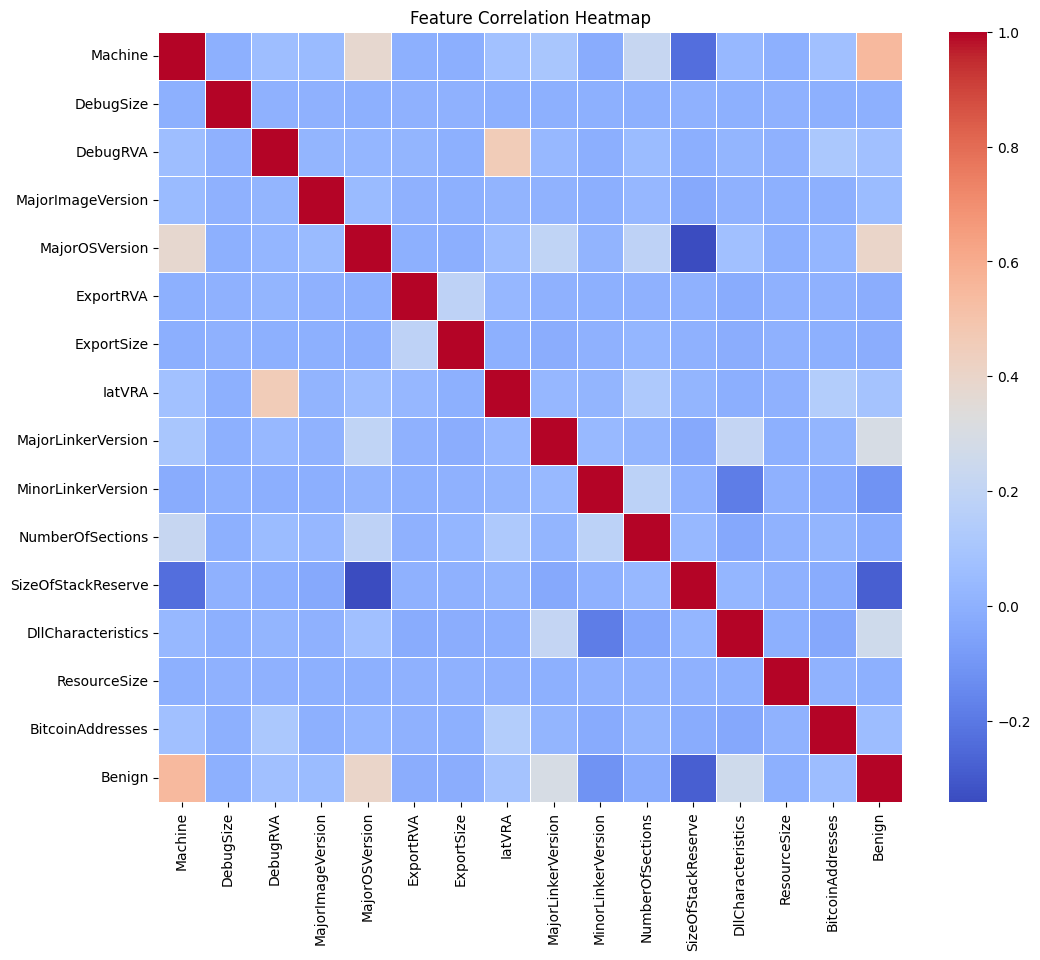

In [8]:
# Select only numeric columns before correlation
numeric_df = df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

Removing the non-informative columns

In [9]:
# Identifier Columns -> "FileName", "md5Hash"
df = df.drop(columns=["FileName", "md5Hash"])

**2. Handling Datatypes**

Identifying the categorical and numerical features

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Machine             62485 non-null  int64
 1   DebugSize           62485 non-null  int64
 2   DebugRVA            62485 non-null  int64
 3   MajorImageVersion   62485 non-null  int64
 4   MajorOSVersion      62485 non-null  int64
 5   ExportRVA           62485 non-null  int64
 6   ExportSize          62485 non-null  int64
 7   IatVRA              62485 non-null  int64
 8   MajorLinkerVersion  62485 non-null  int64
 9   MinorLinkerVersion  62485 non-null  int64
 10  NumberOfSections    62485 non-null  int64
 11  SizeOfStackReserve  62485 non-null  int64
 12  DllCharacteristics  62485 non-null  int64
 13  ResourceSize        62485 non-null  int64
 14  BitcoinAddresses    62485 non-null  int64
 15  Benign              62485 non-null  int64
dtypes: int64(16)
memory usage: 7.6 MB


In [11]:
categorical_cols = ['Machine'] 
df['Machine'] = df['Machine'].astype(str)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

target_col = 'Benign'
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

In [12]:
df['Machine'] = df['Machine'].astype(str)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # make sure it's not sparse
encoded_cat = encoder.fit_transform(df[['Machine']])

encoded_cat_df = pd.DataFrame(
    encoded_cat,
    columns=encoder.get_feature_names_out(['Machine']),
    index=df.index
)

print(type(df[['Machine']]))         # should be DataFrame
print(df[['Machine']].head())        # shows first few rows
print('Encoded new columns: ',encoder.get_feature_names_out(['Machine']))
print('Shape after encoding: ',encoded_cat.shape)
print('Unique values:', df['Machine'].unique())

# Drop original 'Machine' and add encoded ones
df = df.drop(columns=['Machine'])
df = pd.concat([df, encoded_cat_df], axis=1)

# Normalize numerical columns
numerical_cols = ['SizeOfStackReserve', 'ResourceSize']  # replace/add more as needed
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

<class 'pandas.core.frame.DataFrame'>
  Machine
0     332
1   34404
2     332
3   34404
4   34404
Encoded new columns:  ['Machine_0' 'Machine_332' 'Machine_34404' 'Machine_43620' 'Machine_452'
 'Machine_870']
Shape after encoding:  (62485, 6)
Unique values: ['332' '34404' '452' '43620' '0' '870']


Checking for imbalance in the target column

In [13]:
class_counts = df[target_col].value_counts()
print("Class Distribution:\n", class_counts)
ratio = class_counts.min() / class_counts.max()
print("Ratio of classes 0:1 :: ", ratio)
if ratio>=0.7:
    print("Acceptable - Balanced!")
# if ratio <0.7 unexceptable - > Apply SMOTE

Class Distribution:
 Benign
0    35367
1    27118
Name: count, dtype: int64
Ratio of classes 0:1 ::  0.7667599739870501
Acceptable - Balanced!


Creating interaction term between "DebugSize" and "ResourceSize" - together they can reveal patterns that wouldn't be obvious on their own

In [14]:
df['Debug_Resource_Interaction'] = df['DebugSize'] * df['ResourceSize']

In [15]:
def shannon_entropy(data):
    probs = np.bincount(data) / len(data)
    return -np.sum([p * np.log2(p) for p in probs if p > 0])

# Binary columns considered for entropy-based analysis
DebugSize_entropy = shannon_entropy(df['DebugSize'])
ExportSize_entropy = shannon_entropy(df['ExportSize'])
ResourceSize_entropy = shannon_entropy(df['ResourceSize'])
BitcoinAddresses_entropy = shannon_entropy(df['BitcoinAddresses'])

print(DebugSize_entropy, ExportSize_entropy, ResourceSize_entropy, BitcoinAddresses_entropy)


1.6113685059481246 3.891359874667191 0.007991715436706572 0.1300837763068021


Defining features and target

In [16]:
X = df.drop(columns=["Benign"])
y = df["Benign"]

Splitting data into training, validation and testing data

In [17]:
from sklearn.model_selection import train_test_split, StratifiedKFold

# Split into training (80%), validation (10%), test (10%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, stratify=y_temp, random_state=42)

# Final sizes (approx)
print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Train size: (43739, 21)
Validation size: (6249, 21)
Test size: (12497, 21)


**3.Model Training**

In [18]:
# Libraries or modules for the models
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
#from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import  cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay


Function for cross validation, hyperparameter tuning, final evaluation

In [19]:
def evaluate_model(y_test, y_pred, y_proba):

    acc = accuracy_score(y_test, y_pred)*100
    prec = precision_score(y_test, y_pred)*100
    rec = recall_score(y_test, y_pred)*100
    f1 = f1_score(y_test, y_pred)*100
    roc_auc = roc_auc_score(y_test, y_proba)*100

    print("\nTest Set Performance:")
    print(f"Accuracy       : {acc:.4f}")
    print(f"Precision      : {prec:.4f}")
    print(f"Recall         : {rec:.4f}")
    print(f"F1 Score       : {f1:.4f}")
    print(f"ROC AUC Score  : {roc_auc:.4f}")

    return acc, prec, rec, f1, roc_auc

3.1 Random Forest

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Cross-Validation Accuracy: 99.6296 ± 0.0186

Test Set Performance:
Accuracy       : 99.5999
Precision      : 99.6306
Recall         : 99.4469
F1 Score       : 99.5387
ROC AUC Score  : 99.9596


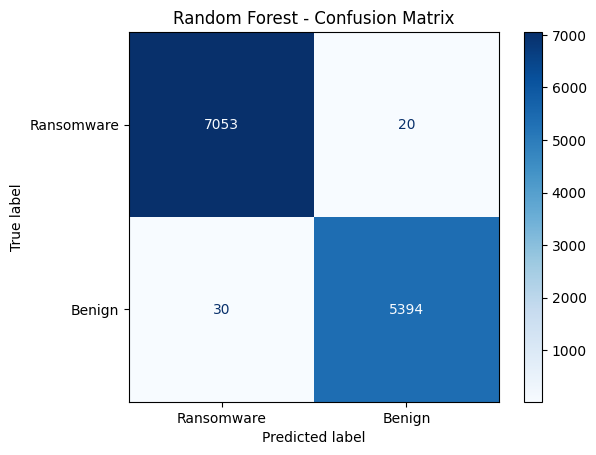

In [20]:
# Initialize model
rf = RandomForestClassifier(random_state=42)

# Defining parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# GridSearchCV for hyperparameter tuning
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)
# Best estimator
best_rf = grid_rf.best_estimator_
print("Best Parameters:", grid_rf.best_params_)

# Cross-validation
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: {:.4f} ± {:.4f}".format(cv_scores.mean()*100, cv_scores.std()*100))

# Predicting on test set
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Evaluating
rf_acc, rf_prec, rf_rec, rf_f1, rf_roc_auc = evaluate_model(y_test, y_pred, y_proba)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ransomware', 'Benign'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest - Confusion Matrix")
plt.show()


3.2 LightGBM

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[LightGBM] [Info] Number of positive: 18982, number of negative: 24757
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1811
[LightGBM] [Info] Number of data points in the train set: 43739, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433983 -> initscore=-0.265617
[LightGBM] [Info] Start training from score -0.265617
Best Parameters: {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200, 'num_leaves': 50}
[LightGBM] [Info] Number of positive: 15185, number of negative: 19806
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col

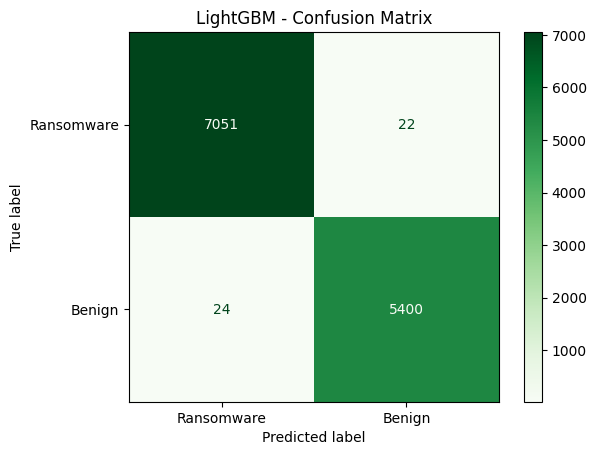

In [21]:

# Initialize LightGBM model
lgbm = lgb.LGBMClassifier(random_state=42)

# Define parameter grid for LightGBM
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.01],
    'num_leaves': [31, 50]
}

# Perform GridSearchCV
grid_lgb = GridSearchCV(lgbm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_lgb.fit(X_train, y_train)

# Best estimator after tuning
best_lgb = grid_lgb.best_estimator_
print("Best Parameters:", grid_lgb.best_params_)

# Cross-validation score
cv_scores = cross_val_score(best_lgb, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy: {:.4f} ± {:.4f}".format(cv_scores.mean()*100, cv_scores.std()*100))

# Predict on test set
y_pred = best_lgb.predict(X_test)
y_proba = best_lgb.predict_proba(X_test)[:, 1]

# Performance metrics
lgbm_acc, lgbm_prec, lgbm_rec, lgbm_f1, lgbm_roc_auc = evaluate_model(y_test, y_pred, y_proba)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ransomware', 'Benign'])
disp.plot(cmap=plt.cm.Greens)
plt.title("LightGBM - Confusion Matrix")
plt.show()


Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\YOGA\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:30:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}


c:\Users\YOGA\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:30:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\YOGA\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:30:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\YOGA\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:30:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\YOGA\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:30:43] WARNING: C:\actions-r

Cross-Validation Accuracy: 99.6136 ± 0.0594

Test Set Performance:
Accuracy       : 99.6239
Precision      : 99.5942
Recall         : 99.5391
F1 Score       : 99.5666
ROC AUC Score  : 99.9778


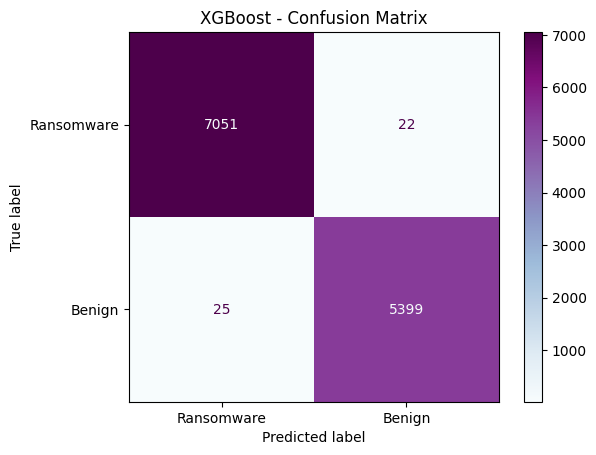

In [22]:
# Initialize XGBoost model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 1.0]
}

# Perform GridSearchCV
grid_xgb = GridSearchCV(xgb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_xgb.fit(X_train, y_train)

# Best estimator after tuning
best_xgb = grid_xgb.best_estimator_
print("Best Parameters:", grid_xgb.best_params_)

# Cross-validation score
cv_scores = cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: {:.4f} ± {:.4f}".format(cv_scores.mean()*100, cv_scores.std()*100))

# Predict on test set
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

# Performance metrics
xgb_acc, xgb_prec, xgb_rec, xgb_f1, xgb_roc_auc = evaluate_model(y_test, y_pred, y_proba)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ransomware', 'Benign'])
disp.plot(cmap=plt.cm.BuPu)
plt.title("XGBoost - Confusion Matrix")
plt.show()

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 10, 'penalty': 'l1'}
Cross-Validation Accuracy: 87.3637 ± 0.4940

Test Set Performance:
Accuracy       : 87.1569
Precision      : 92.3111
Recall         : 76.8068
F1 Score       : 83.8482
ROC AUC Score  : 96.2513


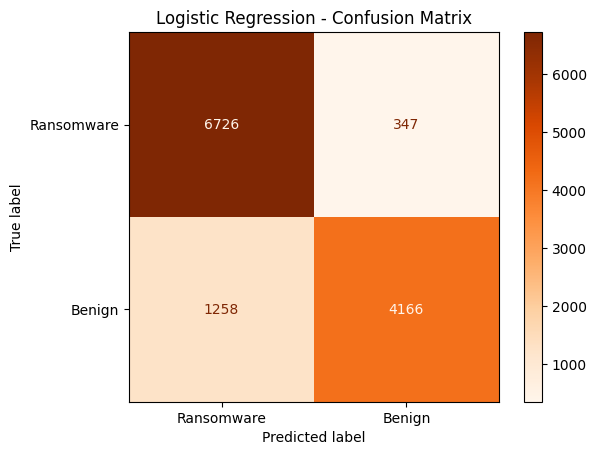

In [23]:
# Initialize Logistic Regression model
lr = LogisticRegression(solver='liblinear', random_state=42)

# Define parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10]
}

# Perform GridSearchCV
grid_lr = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_lr.fit(X_train, y_train)

# Best estimator
best_lr = grid_lr.best_estimator_
print("Best Parameters:", grid_lr.best_params_)

# Cross-validation score
cv_scores = cross_val_score(best_lr, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy: {:.4f} ± {:.4f}".format(cv_scores.mean()*100, cv_scores.std()*100))

# Predict on test set
y_pred = best_lr.predict(X_test)
y_proba = best_lr.predict_proba(X_test)[:, 1]

# Performance metrics
lr_acc, lr_prec, lr_rec, lr_f1, lr_roc_auc = evaluate_model(y_test, y_pred, y_proba)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ransomware', 'Benign'])
disp.plot(cmap=plt.cm.Oranges)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


c:\Users\YOGA\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:30:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 18982, number of negative: 24757
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1811
[LightGBM] [Info] Number of data points in the train set: 43739, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433983 -> initscore=-0.265617
[LightGBM] [Info] Start training from score -0.265617

Test Set Performance:
Accuracy       : 99.5839
Precision      : 99.5938
Recall         : 99.4469
F1 Score       : 99.5203
ROC AUC Score  : 99.9081


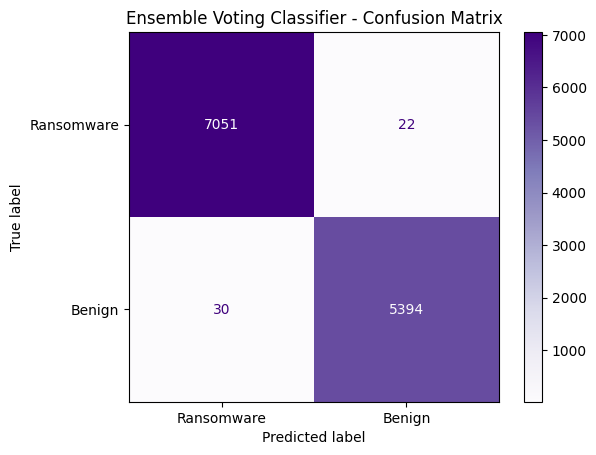

In [24]:
# Initialize voting classifier with best estimators from previous tuning
voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('xgb', best_xgb),
        ('lgb', best_lgb),
        ('lr', best_lr),
    ],
    voting='soft'  # Use 'soft' voting to consider predicted probabilities
)
# Fit on training data
voting_clf.fit(X_train, y_train)

# Predict on test set
y_pred = voting_clf.predict(X_test)
y_proba = voting_clf.predict_proba(X_test)[:, 1]

# Performance metrics
en_acc, en_prec, en_rec, en_f1, en_roc_auc = evaluate_model(y_test, y_pred, y_proba)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ransomware', 'Benign'])
disp.plot(cmap=plt.cm.Purples)
plt.title("Ensemble Voting Classifier - Confusion Matrix")
plt.show()



Model Performance Comparison Table:

                 Model   Accuracy  Precision     Recall   F1 Score    ROC AUC
0        Random Forest  99.599904  99.630587  99.446903  99.538660  99.959600
1             LightGBM  99.631912  99.594246  99.557522  99.575881  99.976001
2              XGBoost  99.623910  99.594171  99.539086  99.566621  99.977785
3  Logistic Regression  87.156918  92.311101  76.806785  83.848244  96.251267
4    Ensemble (Voting)  99.583900  99.593796  99.446903  99.520295  99.908079


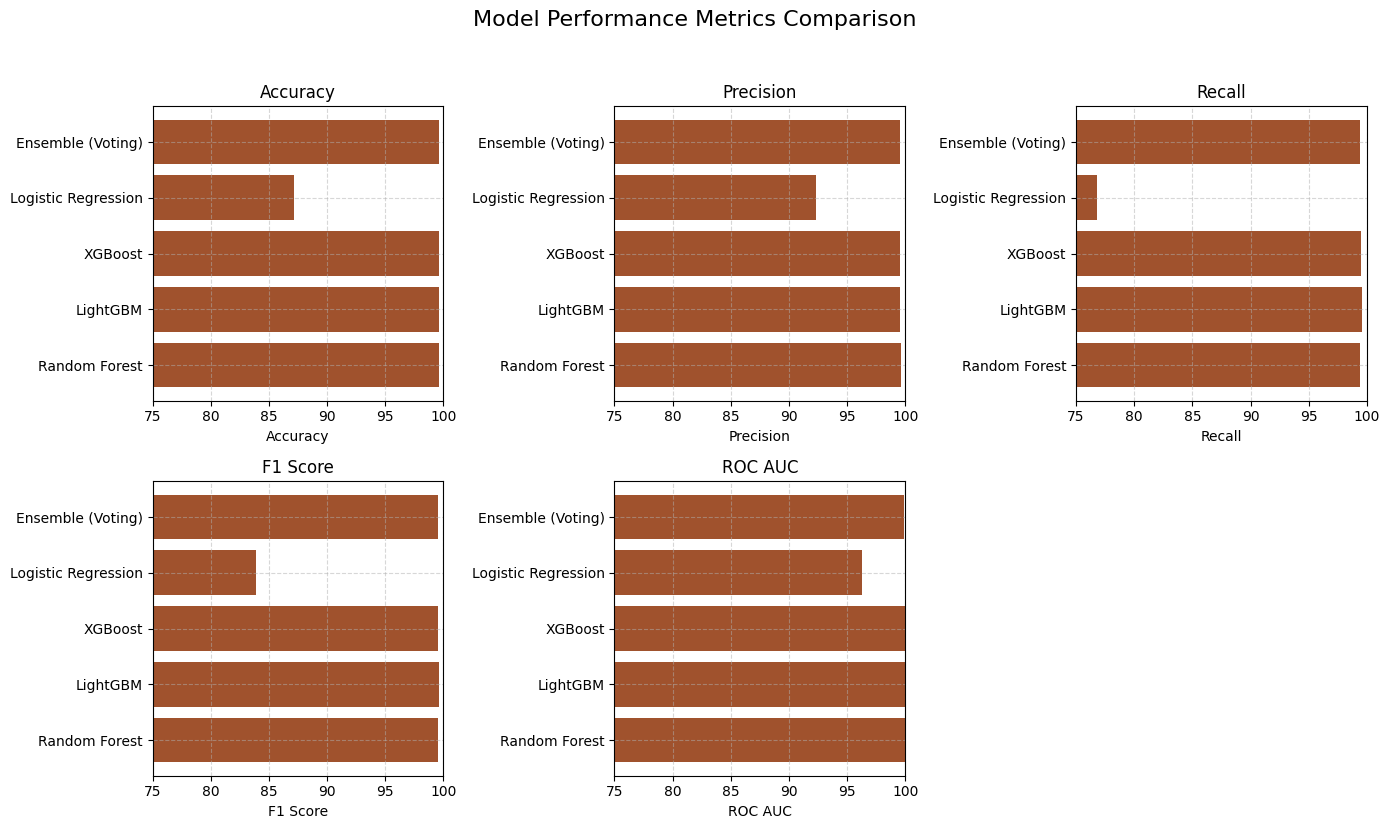

In [37]:
# Create a DataFrame with model performance metrics
model_results = pd.DataFrame({
    'Model': [
        'Random Forest',
        'LightGBM',
        'XGBoost',
        'Logistic Regression',
        'Ensemble (Voting)'
    ],
    'Accuracy': [rf_acc, lgbm_acc, xgb_acc, lr_acc, en_acc],
    'Precision': [rf_prec, lgbm_prec, xgb_prec, lr_prec, en_prec],
    'Recall': [rf_rec, lgbm_rec, xgb_rec, lr_rec, en_rec],
    'F1 Score': [rf_f1, lgbm_f1, xgb_f1, lr_f1, en_f1],
    'ROC AUC': [rf_roc_auc, lgbm_roc_auc, xgb_roc_auc, lr_roc_auc, en_roc_auc]
})

# Display the table
print("\nModel Performance Comparison Table:\n")
print(model_results)

# Plotting the comparison as bar charts
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
model_names = model_results['Model']

plt.figure(figsize=(14, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.barh(model_names, model_results[metric], color='sienna')
    plt.xlabel(metric)
    plt.xlim(75, 100)
    plt.title(metric)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()

plt.suptitle("Model Performance Metrics Comparison", fontsize=16, y=1.03)
plt.tight_layout()
plt.show()
